# GuideScan Guide Efficiency Missingness Analysis

This notebook shows the exploratory work done to understand the missingness in GuideScan guide efficiency values. We found that because the spacers for TSS sequences were 19 bp long, they all had no GuideScan 2.0 outputs, likely due to GuideScan 2.0 not yet being able to support 19bp spacers. As a result, we exclude these guides from the table and output a new table titled "guidescan_output_no_tss.csv'. 

Author: Karthik Guruvayurappan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# load in output file from GuideScan
guidescan_output = pd.read_csv('/iblm/netapp/home/karthik/GuideScan/Gasperini2019/guidescan_output.csv')
guidescan_output['guide_spacer'] = guidescan_output['gRNA'].apply(lambda x: x[:-3])
guidescan_output.head()

,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
0,0,CTAAAGCATTGGCTGAGAAGNGG,chr8,23911081.0,23911103.0,-,41.0,2:2 | 3:39,0.136228,0.565010,CTAAAGCATTGGCTGAGAAG
1,1,GTAGTTCACATAATCCCTGTNGG,chr4,25698193.0,25698215.0,-,55.0,2:0 | 3:55,0.165929,0.572492,GTAGTTCACATAATCCCTGT
2,2,AAGTTGACTCTACATAGCAGNGG,chr8,23912565.0,23912587.0,+,22.0,2:1 | 3:21,0.341067,0.636691,AAGTTGACTCTACATAGCAG
3,3,AATATTCTCCCTCATTCTGGNGG,chr5,12539360.0,12539382.0,-,803.0,2:26 | 3:777,0.002744,0.619800,AATATTCTCCCTCATTCTGG
4,4,AATCCTCTAATGGACGAAGANGG,chr8,23913057.0,23913079.0,-,24.0,2:0 | 3:24,0.334415,0.602272,AATCCTCTAATGGACGAAGA


In [3]:
# load in gRNA groups with spacer sequences
guide_sequences = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/gasperini_2019_suppl_table_2.csv')
guide_sequences.head()

,Spacer,Target_Site,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer,Category
0,AATGAGGAGCAAACGAAAAT,control,NaN,NaN,NaN,NTC
1,ACGAAATGTTTCATGACCAA,control,NaN,NaN,NaN,NTC
2,ATAGATTTACGTTACTCTCT,control,NaN,NaN,NaN,NTC
3,ATTAGCATCAGGTAGACTAA,control,NaN,NaN,NaN,NTC
4,CCATAAAGAATTCGGTGTAG,control,NaN,NaN,NaN,NTC


In [4]:
# merge data frames together on spacer sequence
guide_sequences = guide_sequences.merge(guidescan_output, left_on = 'Spacer', right_on = 'guide_spacer')
guide_sequences.head()

,Spacer,Target_Site,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer,Category,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
0,AATGAGGAGCAAACGAAAAT,control,NaN,NaN,NaN,NTC,0,AATGAGGAGCAAACGAAAATNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AATGAGGAGCAAACGAAAAT
1,ACGAAATGTTTCATGACCAA,control,NaN,NaN,NaN,NTC,1,ACGAAATGTTTCATGACCAANGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACGAAATGTTTCATGACCAA
2,ATAGATTTACGTTACTCTCT,control,NaN,NaN,NaN,NTC,2,ATAGATTTACGTTACTCTCTNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATAGATTTACGTTACTCTCT
3,ATTAGCATCAGGTAGACTAA,control,NaN,NaN,NaN,NTC,3,ATTAGCATCAGGTAGACTAANGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATTAGCATCAGGTAGACTAA
4,CCATAAAGAATTCGGTGTAG,control,NaN,NaN,NaN,NTC,4,CCATAAAGAATTCGGTGTAGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCATAAAGAATTCGGTGTAG


In [5]:
guide_sequences['Category'].unique()

array(['NTC',
       'candidate_enhancer:picked_by_exploratory_submodular_selection',
       'candidate_enhancer:picked_by_model_built_from_pilot',
       'Positive_control_to_globin_locus',
       'candidate_enhancer:repeated_from_pilot:alternative_gRNA_pair',
       'candidate_enhancer:repeated_from_pilot:top_gRNA_pair', 'TSS'],
      dtype=object)

In [6]:
# filter out positive control guides that do not work with GuideScan (19bp spacers)
guide_sequences = guide_sequences[guide_sequences['Spacer'].str.len() != 19]
guide_sequences.head()

,Spacer,Target_Site,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer,Category,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
0,AATGAGGAGCAAACGAAAAT,control,NaN,NaN,NaN,NTC,0,AATGAGGAGCAAACGAAAATNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AATGAGGAGCAAACGAAAAT
1,ACGAAATGTTTCATGACCAA,control,NaN,NaN,NaN,NTC,1,ACGAAATGTTTCATGACCAANGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACGAAATGTTTCATGACCAA
2,ATAGATTTACGTTACTCTCT,control,NaN,NaN,NaN,NTC,2,ATAGATTTACGTTACTCTCTNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATAGATTTACGTTACTCTCT
3,ATTAGCATCAGGTAGACTAA,control,NaN,NaN,NaN,NTC,3,ATTAGCATCAGGTAGACTAANGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATTAGCATCAGGTAGACTAA
4,CCATAAAGAATTCGGTGTAG,control,NaN,NaN,NaN,NTC,4,CCATAAAGAATTCGGTGTAGNGG,No match found for input sequence.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCATAAAGAATTCGGTGTAG


In [7]:
# filter out NTC guides
guide_sequences = guide_sequences[guide_sequences['Category'] != 'NTC']
guide_sequences.head()

,Spacer,Target_Site,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer,Category,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
101,GCAAGGTGAATGTGAAGCTG,chr10.1079,chr10,30475431.0,30475556.0,candidate_enhancer:picked_by_exploratory_submo...,659,GCAAGGTGAATGTGAAGCTGNGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCAAGGTGAATGTGAAGCTG
102,TGAGTTCTCATCAGTCTGGG,chr10.1079,chr10,30475431.0,30475556.0,candidate_enhancer:picked_by_exploratory_submo...,20,TGAGTTCTCATCAGTCTGGGNGG,chr10,30186527.0,30186549.0,-,32.0,2:0 | 3:32,0.160097,0.611536,TGAGTTCTCATCAGTCTGGG
103,GCGCAGGATACTATGAAACC,chr10.1125,chr10,31014654.0,31014906.0,candidate_enhancer:picked_by_exploratory_submo...,21,GCGCAGGATACTATGAAACCNGG,chr10,30725935.0,30725957.0,-,0.0,2:0 | 3:0,0.916107,0.607596,GCGCAGGATACTATGAAACC
104,AGGCAGCCCTGGAAACACCC,chr10.1125,chr10,31014654.0,31014906.0,candidate_enhancer:picked_by_exploratory_submo...,22,AGGCAGCCCTGGAAACACCCNGG,chr10,30725915.0,30725937.0,-,80.0,2:8 | 3:72,0.091456,0.601522,AGGCAGCCCTGGAAACACCC
105,TCATTTATCACCTAGCACAT,chr10.1198,chr10,33798171.0,33798360.0,candidate_enhancer:picked_by_exploratory_submo...,23,TCATTTATCACCTAGCACATNGG,chr10,33509275.0,33509297.0,-,61.0,2:5 | 3:56,0.163203,0.570094,TCATTTATCACCTAGCACAT


In [8]:
guide_sequences.shape

(12326, 17)

In [9]:
guide_sequences = guide_sequences[guide_sequences['Category'] != 'Positive_control_to_globin_locus']
guide_sequences.shape

(12312, 17)

In [10]:
# count the number of guides that do not have an efficiency
unmatched_guides = guide_sequences[guide_sequences['Start'].isna()]
unmatched_guides.shape

(1415, 17)

In [9]:
unmatched_guides.head()

,Spacer,Target_Site,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer,Category,Index,gRNA,Chromosome,Start,End,Strand,Num Off-Targets,Off-Target Summary,Specificity,Cutting-Efficiency,guide_spacer
101,GCAAGGTGAATGTGAAGCTG,chr10.1079,chr10,30475431.0,30475556.0,candidate_enhancer:picked_by_exploratory_submo...,659,GCAAGGTGAATGTGAAGCTGNGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCAAGGTGAATGTGAAGCTG
107,GTGCAGACACCAGCACTAGG,chr10.1268,chr10,35863846.0,35864009.0,candidate_enhancer:picked_by_exploratory_submo...,660,GTGCAGACACCAGCACTAGGNGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTGCAGACACCAGCACTAGG
162,CACAGCCCCTCTGCTGAGCT,chr11.4422,chr11,76018656.0,76018702.0,candidate_enhancer:picked_by_exploratory_submo...,661,CACAGCCCCTCTGCTGAGCTNGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CACAGCCCCTCTGCTGAGCT
167,CTGCCCAGCGGCCTTCCACA,chr1.1505,chr1,9205243.0,9205660.0,candidate_enhancer:picked_by_exploratory_submo...,662,CTGCCCAGCGGCCTTCCACANGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTGCCCAGCGGCCTTCCACA
185,GTGTGGAAGGGAAAAAAAAA,chr12.1034,chr12,34445241.0,34445334.0,candidate_enhancer:picked_by_exploratory_submo...,663,GTGTGGAAGGGAAAAAAAAANGG,Guide not found in Guidescan2 database. This i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTGTGGAAGGGAAAAAAAAA


/tmp/ipykernel_21545/558920184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})


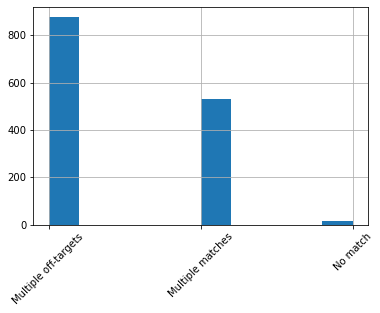

In [10]:
# plot the distribution of GuideScan failure reasons
unmatched_guides['Chromosome'] = unmatched_guides['Chromosome'].replace({'No match found for input sequence.': 'No match', 'Guide not found in Guidescan2 database. This is because it has multiple off-targets at distance 1.': 'Multiple off-targets', 'Multiple perfect matches found. Cannot resolve sequence to unique coordinates.': 'Multiple matches'})
ax = plt.gca()
plt.xticks(rotation=45)
unmatched_guides['Chromosome'].hist();

In [11]:
# write guide sequences to output file
guide_sequences.to_csv('/iblm/netapp/home/karthik/GuideScan/Gasperini2019/enhancer_guidescan_output.csv', index = False)